This notebook consists in a classification test the goal here is compare the processing time between  CPU and GPU, google colabs also offers TPU a future approach could be compare GPU and TPU. For further background on the task refer to Midterm 2 part A.

In [3]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from keras.datasets import cifar10
from keras.applications import resnet50
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
sns.set()
#!pip install ipython-autotime
import autotime 
%load_ext autotime
%matplotlib inline

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.47 s


In [5]:
# Setting labels
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

time: 0 ns


In [6]:
#Loading the data
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

time: 703 ms


In [7]:
#Shape of data
print('X_train shape: {}, y_train_labels.shape: {}'
      .format(X_train.shape, y_train.shape))
print('X_test shape: {}, y_test_labels.shape: {}'.format(X_test.shape, y_test.shape))

X_train shape: (50000, 32, 32, 3), y_train_labels.shape: (50000, 1)
X_test shape: (10000, 32, 32, 3), y_test_labels.shape: (10000, 1)
time: 0 ns


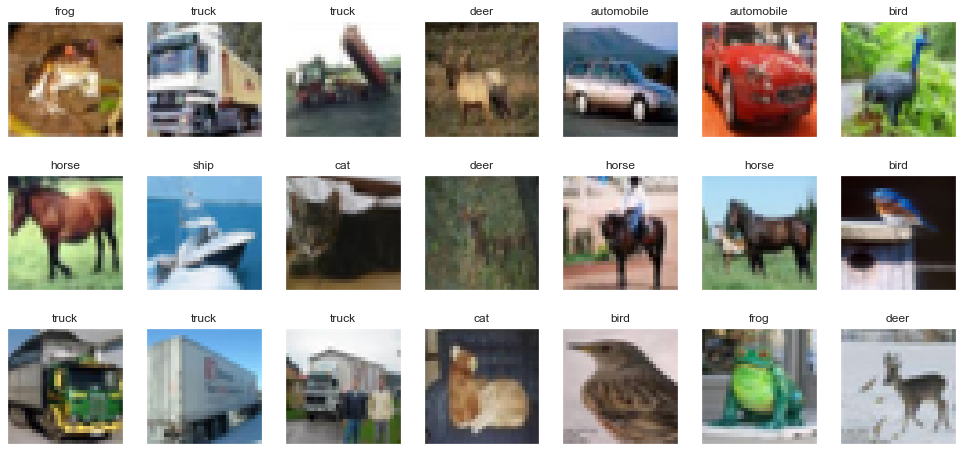

time: 844 ms


In [8]:
#Checking the images
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [9]:
#Label pre processing
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test= tensorflow.keras.utils.to_categorical(y_test, 10)
y_test.shape

(10000, 10)

time: 16 ms


In [10]:
#Reshape
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, 32, 32)
    X_test = X_test.reshape(X_test.shape[0], 3, 32, 32)
    input_shape = (3, 32, 32)
else:
    X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
    X_test = X_test.reshape(X_test.shape[0], 32,32 ,3)
    input_shape = (32,32, 3)
    
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

time: 375 ms


In [11]:
#Building a model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(512, activation='relu'))
# Another dropout
model.add(Dropout(0.25))
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

time: 281 ms


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               6423040   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='RMSProp',
              metrics=['accuracy'])

time: 47 ms


In [14]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 173s 3ms/sample - loss: 1.3494 - accuracy: 0.5269 - val_loss: 1.0728 - val_accuracy: 0.6303
Epoch 2/50
50000/50000 [==============================] - 170s 3ms/sample - loss: 0.9587 - accuracy: 0.6712 - val_loss: 0.9276 - val_accuracy: 0.6813
Epoch 3/50
50000/50000 [==============================] - 167s 3ms/sample - loss: 0.8277 - accuracy: 0.7200 - val_loss: 1.0412 - val_accuracy: 0.6513
Epoch 4/50
50000/50000 [==============================] - 174s 3ms/sample - loss: 0.7511 - accuracy: 0.7540 - val_loss: 0.9824 - val_accuracy: 0.6829
Epoch 5/50
50000/50000 [==============================] - 165s 3ms/sample - loss: 0.7073 - accuracy: 0.7712 - val_loss: 1.5706 - val_accuracy: 0.6482
Epoch 6/50
50000/50000 [==============================] - 8380s 168ms/sample - loss: 0.6792 - accuracy: 0.7794 - val_loss: 1.2219 - val_accuracy: 0.6511
Epoch 7/50
50000/50000 [=======================

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4231208263397217
Test accuracy: 0.5675
time: 5.24 s


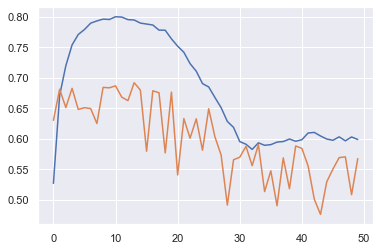

time: 312 ms


In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

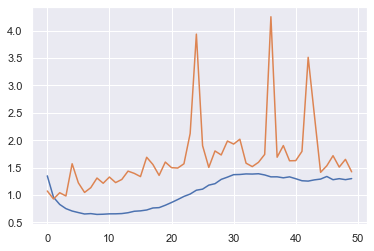

time: 140 ms


In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [18]:
#Load images
truck = image.load_img("truck.jpg", target_size=(32, 32))
auto = image.load_img("automobile.jpg", target_size=(32, 32))
dog = image.load_img("dog.jpg", target_size=(32, 32))
cat = image.load_img("cat.jpg", target_size=(32, 32))
plane = image.load_img("airplane.jpg", target_size=(32, 32))

time: 125 ms


In [19]:
truck = image.img_to_array(truck)
auto = image.img_to_array(auto)
dog = image.img_to_array(dog)
cat = image.img_to_array(cat)
plane = image.img_to_array(plane)

time: 15 ms


In [20]:
truck= np.expand_dims(truck, axis=0)
auto = np.expand_dims(auto, axis=0)
dog = np.expand_dims(dog, axis=0)
cat = np.expand_dims(cat, axis=0)
plane = np.expand_dims(plane, axis=0)

time: 0 ns


In [21]:
predictions_truck = model.predict(truck)
predictions_auto = model.predict(auto)
predictions_dog = model.predict(dog)
predictions_cat = model.predict(cat)
predictions_plane = model.predict(plane)

time: 359 ms


In [ ]:
#1: Airplane
#2: Car
#3: Bird
#4: Cat
#5: Deer
#6: Dog
#7: Frog
#8: Horse
#9: Ship
#10: Truck

In [22]:
print("Prediction truck")
predictions_truck
#Predicted: Truck
#Actual" Truck

Prediction truck


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

time: 16 ms


In [23]:
print("Prediction Auto")
predictions_auto
#Predicted: Car
#Actual:Car

Prediction Auto


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

time: 16 ms


In [24]:
print("Prediction Dog")
predictions_dog
#Predicted:Car
#Actual:Dog

Prediction Dog


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

time: 0 ns


In [25]:
print("Prediction Cat")
predictions_cat
#Predicted: Dog
#Actual:Cat

Prediction Cat


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

time: 0 ns


In [26]:
print("Prediction Airplaine")
predictions_plane
#predicted: Plane
#Actual:Plane

Prediction Airplaine


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

time: 16 ms


<Figure size 288x216 with 0 Axes>

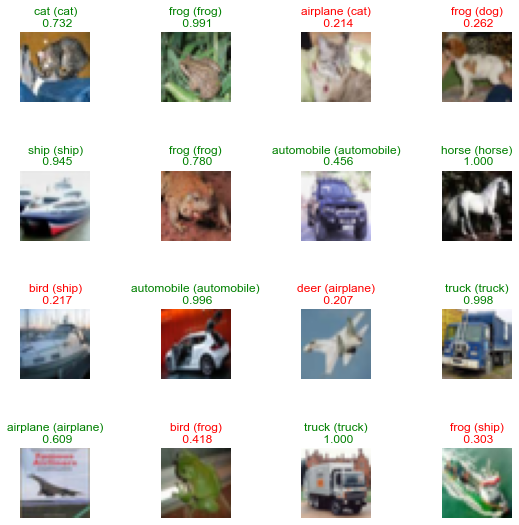

time: 1.88 s


In [27]:
#Test Accuracy
from matplotlib import pyplot
%matplotlib inline
y_test = y_test.argmax(1)

def plot_predictions(images, predictions, true_labels):
  n = images.shape[0]
  nc = int(np.ceil(n / 4))
  fig = pyplot.figure(figsize=(4,3))
  # axes = fig.add_subplot(nc, 4)
  f, axes = pyplot.subplots(nc, 4)
  f.tight_layout()
  for i in range(nc * 4):
    y = i // 4
    x = i % 4
    axes[x, y].axis('off')
    
    label = labels[np.argmax(predictions[i])]
    confidence = np.max(predictions[i])
    if i > n:
      continue
    axes[x, y].imshow(images[i])
    pred_label = np.argmax(predictions[i])
    axes[x, y].set_title("{} ({})\n {:.3f}".format(
      labels[pred_label], 
      labels[true_labels[i]],
      confidence), 
      color=("green" if true_labels[i] == pred_label else "red"))
  pyplot.gcf().set_size_inches(8, 8)  

plot_predictions(
    np.squeeze(X_test[:16]), 
    model.predict(X_test[:16]),
    y_test[:16]
)
